In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from ucimlrepo import fetch_ucirepo

%matplotlib inline


In [3]:
adult = fetch_ucirepo(id=2)

df = adult.data.features
target = adult.data.targets

In [4]:
df['target'] = target
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [5]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
target            object
dtype: object

In [6]:
df.nunique()

age                  74
workclass             9
fnlwgt            28523
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country       42
target                4
dtype: int64

# Clean Data

In [7]:
x = df['marital-status'].unique()
x

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [8]:
y = df['relationship'].unique()
y

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [9]:
z = df['race'].unique()
z

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [97]:
df['target'].unique()

array([ True, False])

In [77]:
df['marital-status'].replace('Never-married', False, inplace=True)
df['marital-status'].replace('Married-civ-spouse', True, inplace=True)
df['marital-status'].replace('Divorced', False, inplace=True)
df['marital-status'].replace('Married-spouse-absent', True, inplace=True)
df['marital-status'].replace('Separated', False, inplace=True)
df['marital-status'].replace('Married-AF-spouse', True, inplace=True)
df['marital-status'].replace('Widowed', False, inplace=True)

df['relationship'].replace('Not-in-family', 0, inplace=True)
df['relationship'].replace('Husband', 1, inplace=True)
df['relationship'].replace('Wife', 1, inplace=True)
df['relationship'].replace('Own-child', 2, inplace=True)
df['relationship'].replace('Unmarried', 0, inplace=True)
df['relationship'].replace('Other-relative', 1, inplace=True)

df['race'].replace('White', 2,inplace=True)
df['race'].replace('Black', 0,inplace=True)
df['race'].replace('Asian-Pac-Islander', 1,inplace=True)
df['race'].replace('Amer-Indian-Eskimo', 0,inplace=True)
df['race'].replace('Other', 0,inplace=True)

df['target'].replace('<=50K', True, inplace=True)
df['target'].replace('<=50K.', True, inplace=True)
df['target'].replace('>50K', False, inplace=True)
df['target'].replace('>50K.', False, inplace=True)

> I have to apologize to you.
But unfortunately, it is a fact that men earn more than women in terms of genders, and due to the existence of racial issues, the highest incomes belong to whites, East Asians, and finally Indians, blacks, and others. There are races
(I hope these differences will disappear soon)

In [78]:
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked',
       nan], dtype=object)

In [62]:
df = df.astype(
    {'sex': 'category'}
)

In [69]:
df.sex = df['sex'].cat.codes

AttributeError: Can only use .cat accessor with a 'category' dtype

In [72]:
df['sex']

0        1
1        1
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    1
48840    1
48841    1
Name: sex, Length: 48842, dtype: int8

In [68]:
df['marital-status']

0        True
1        True
2        True
3        True
4        True
         ... 
48837    True
48838    True
48839    True
48840    True
48841    True
Name: marital-status, Length: 48842, dtype: bool

In [35]:
df['relationship']

0        0
1        1
2        0
3        1
4        1
        ..
48837    0
48838    1
48839    1
48840    2
48841    1
Name: relationship, Length: 48842, dtype: int64

In [43]:
df['race']

0        2
1        2
2        2
3        0
4        0
        ..
48837    2
48838    0
48839    2
48840    1
48841    2
Name: race, Length: 48842, dtype: int64

In [74]:
df['target']

0         True
1         True
2         True
3         True
4         True
         ...  
48837     True
48838     True
48839     True
48840     True
48841    False
Name: target, Length: 48842, dtype: bool

In [75]:
del df['education']

In [76]:
df

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,13,True,Adm-clerical,0,2,1,2174,0,40,United-States,True
1,50,Self-emp-not-inc,83311,13,True,Exec-managerial,1,2,1,0,0,13,United-States,True
2,38,Private,215646,9,True,Handlers-cleaners,0,2,1,0,0,40,United-States,True
3,53,Private,234721,7,True,Handlers-cleaners,1,0,1,0,0,40,United-States,True
4,28,Private,338409,13,True,Prof-specialty,1,0,0,0,0,40,Cuba,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,13,True,Prof-specialty,0,2,0,0,0,36,United-States,True
48838,64,NaN,321403,9,True,NaN,1,0,1,0,0,40,United-States,True
48839,38,Private,374983,13,True,Prof-specialty,1,2,1,0,0,50,United-States,True
48840,44,Private,83891,13,True,Adm-clerical,2,1,1,5455,0,40,United-States,True


In [100]:
df['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands', nan], dtype=object)

<Axes: xlabel='sex', ylabel='Density'>

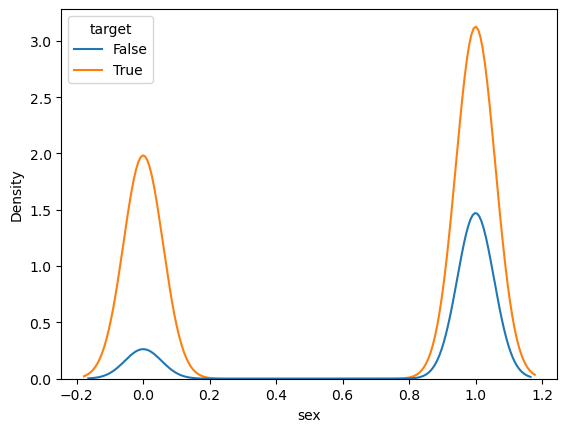

In [107]:
sns.kdeplot(data=df, x="sex", hue='target',)


<Axes: xlabel='target', ylabel='age'>

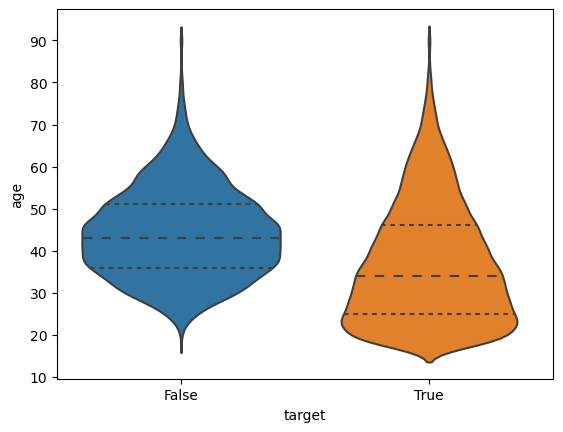

In [98]:
sns.violinplot(data=df, x="target", y="age", inner="quartile", split=True)


In [ ]:
sns.relplot(data=df, x="native-country", y="", inner="quartile", split=True)


c:\Users\Mr\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\Mr\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=vector, **plot_kwargs)
c:\Users\Mr\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=vector, **plot_kwargs)


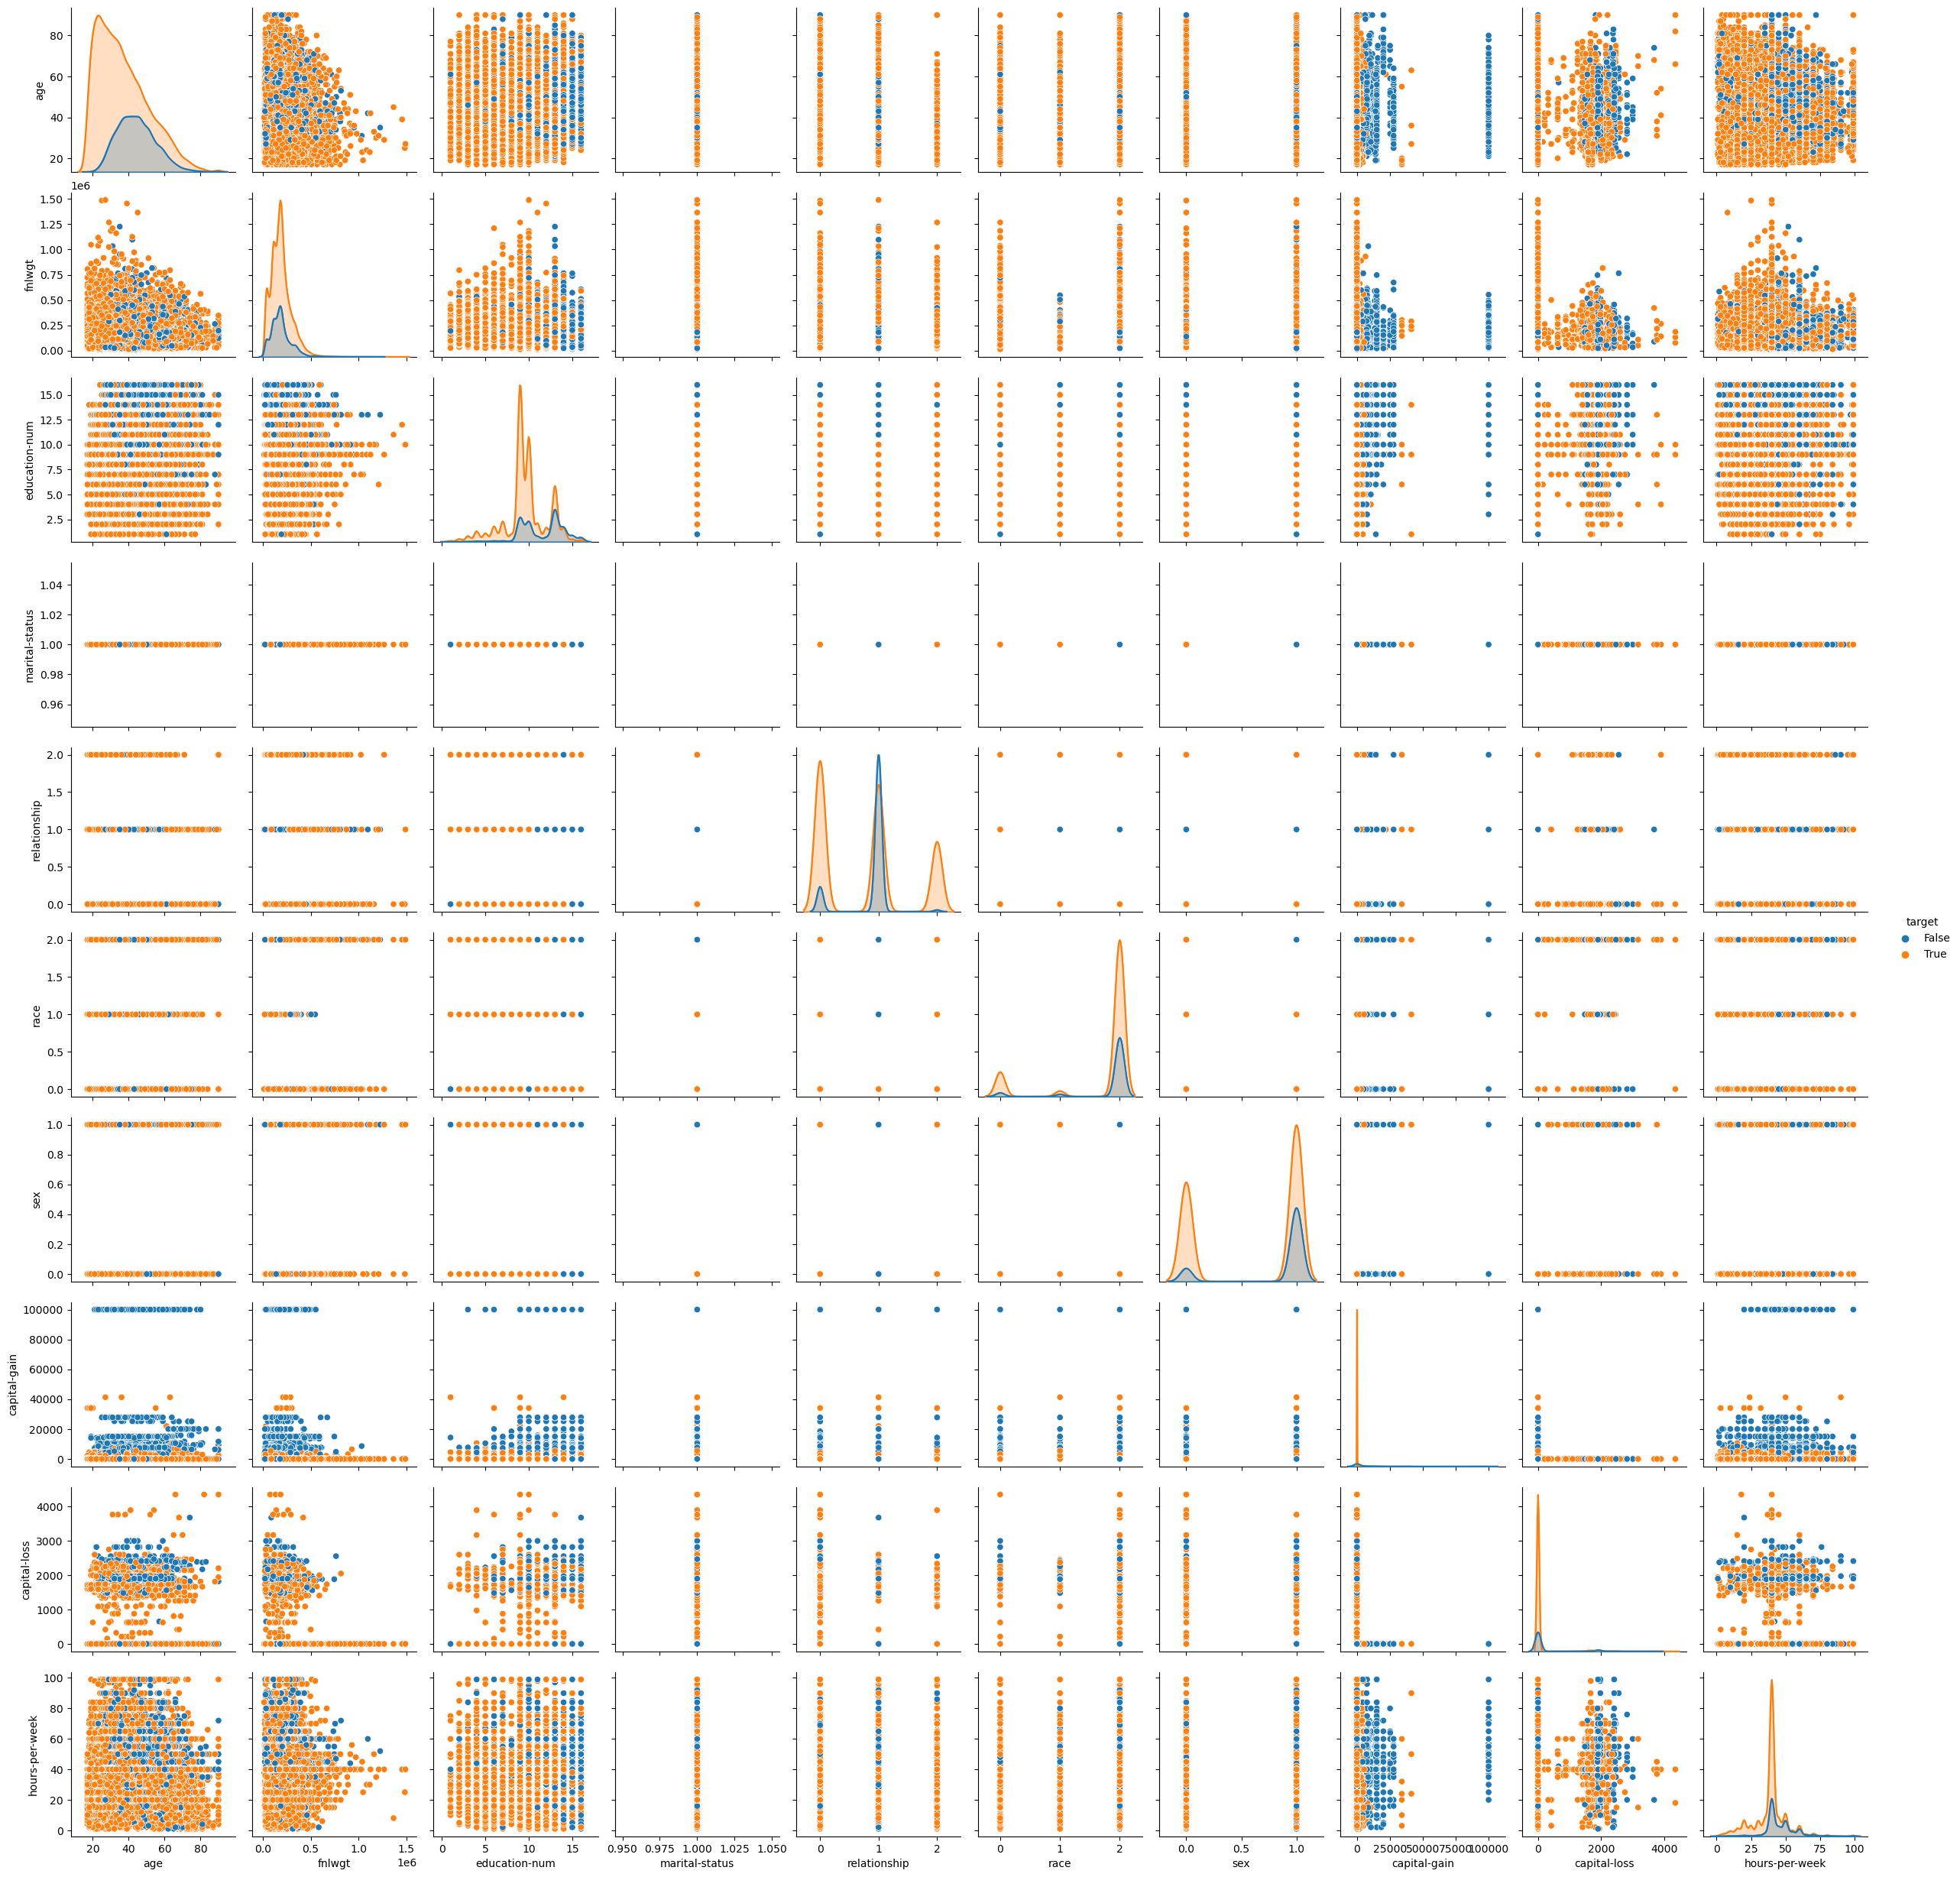

In [84]:
g = sns.pairplot(
    data=df,
    hue='target'
)

g.map_diag(sns.kdeplot, )

In [85]:
df.describe()


,age,fnlwgt,education-num,relationship,race,sex,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,0.792658,1.741186,0.668482,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,0.689050,0.647728,0.470764,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,2.000000,0.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,1.000000,2.000000,1.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,1.000000,2.000000,1.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,2.000000,2.000000,1.000000,99999.000000,4356.000000,99.000000


In [87]:
copy_df = df.copy(deep=False)
del copy_df['workclass']
del copy_df['occupation']
del copy_df['native-country']


<Axes: >

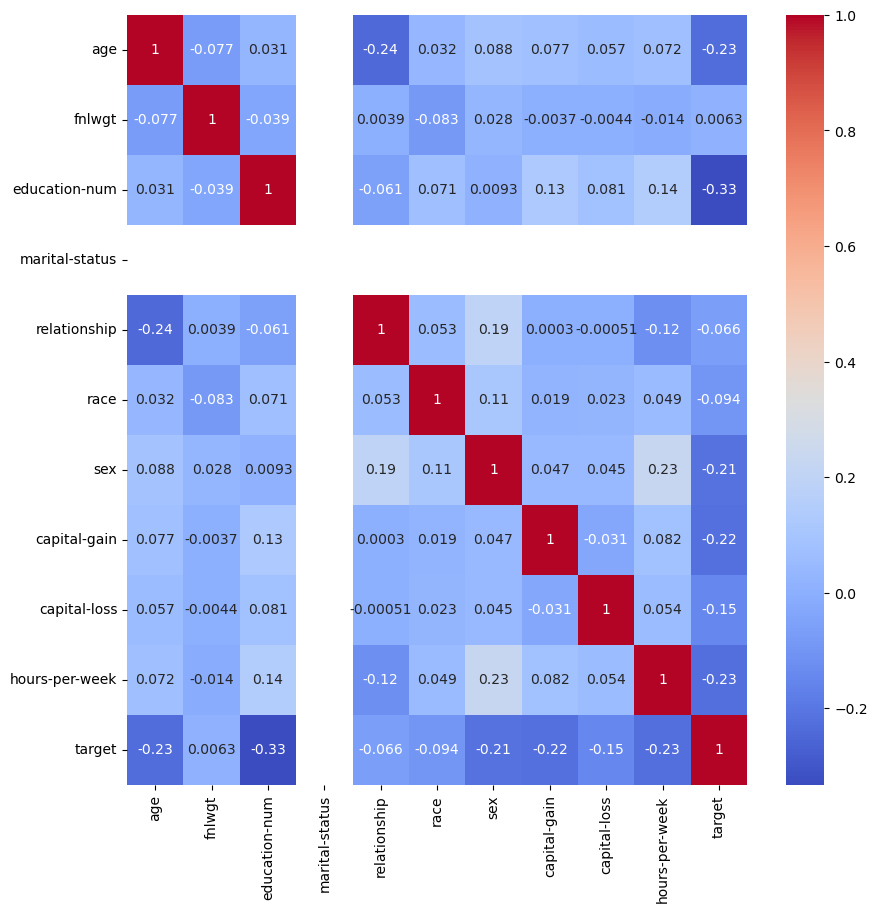

In [96]:
fig, ax = plt.subplots(figsize=(10, 10))



sns.heatmap(copy_df.corr(), annot=True, cmap='coolwarm', ax=ax)